# Crisp DM Method 

### 1. Business Understanding 

-  Increase the sellable devices for a manufacturing company.

Context is: if the early prediction of which devices may fail can be calculated, rework can be done to save these devices before they need to be discarded. End goal is increasing Yield (= sellable devices).  

### 2. Data Understanding 


- columns: date, device id, failure, atrributes1-9

### 3. Data Prep

- data preprocessing: 

fill NA: there was no NA in this data set, if there is => I fill it with mean/median depending on the case. 

check if there is any outliers: there was no outliers detected, I looked it by plotting each and every variable by failure

- feature scaling:
if there is any categorical data, turn them into numerical using label encoding, and/or one hot encoding. 

- normalization/standardization 

if a model will be used which assumes normalized data, or a model which will be sensitive to standardization => standardize the data. In this problem, I standardized my independent variables and also used the non-standard variables for my data


### 4. Modelling

As the outcome is failure with 0 and 1 values, this will be a binary classification problem.

- Linear SVC
- Decision Tree Classifier
- Random Forest Classifier 
- Logistic Regression 
- KNN 
- SVC with Kernal trick ('rbf')

### 5. Evaluation 

- Accuracy ( this does not help us as we have an imbalanced data set)
- Log Loss 
- AUROC score
- Confusuion matrix

# Roadmap

1. Data Preprocessing and visualization
2. Machine Learning Models 
3. Evaluation of Models 
4. Conclusion


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



#score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# 1. Data Preprocessing and Visualization

In [11]:
# Load the training data

data = pd.read_csv('device_failure_worksample.csv',sep=',')
data.head()


,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,15001,S1F01085,215630672,56,0,52,6,407438,0,0,7,0
1,15001,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2,15001,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
3,15001,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
4,15001,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0


In [12]:
# Check for class imbalance

data.groupby('failure').size()/len(data.failure)



failure
0    0.999149
1    0.000851
dtype: float64

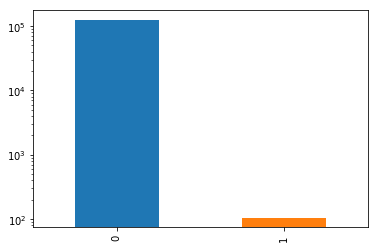

In [13]:
data['failure'].value_counts().plot(kind='bar', logy=True);
# Nearly 99% of the data belongs to class '0' there is clearly a class imbalance issue
# While running the model on full data, I will track performance metrics in addition to the accuracy
#(such as log loss and AUROC scores)

In [14]:
#Let us see the column values
print(data.columns.values)

['date' 'device' 'attribute1' 'attribute2' 'attribute3' 'attribute4'
 'attribute5' 'attribute6' 'attribute7' 'attribute8' 'attribute9'
 'failure']


In [15]:
data.info()
print('_'*40)
# we look at the overall data info  and see we do not have any null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null int64
device        124494 non-null object
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
failure       124494 non-null int64
dtypes: int64(11), object(1)
memory usage: 11.4+ MB
________________________________________


In [16]:
data.describe()


,date,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,15106.222798,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,0.000851
std,78.412061,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,0.029167
min,15001.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,15040.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,0.000000
50%,15086.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,0.000000
75%,15168.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,0.000000
max,15306.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,1.000000


In [17]:
#Dropping the device variable as it is categorical
data_for_view = data
data_for_view.drop(['device'], axis=1, inplace=True)

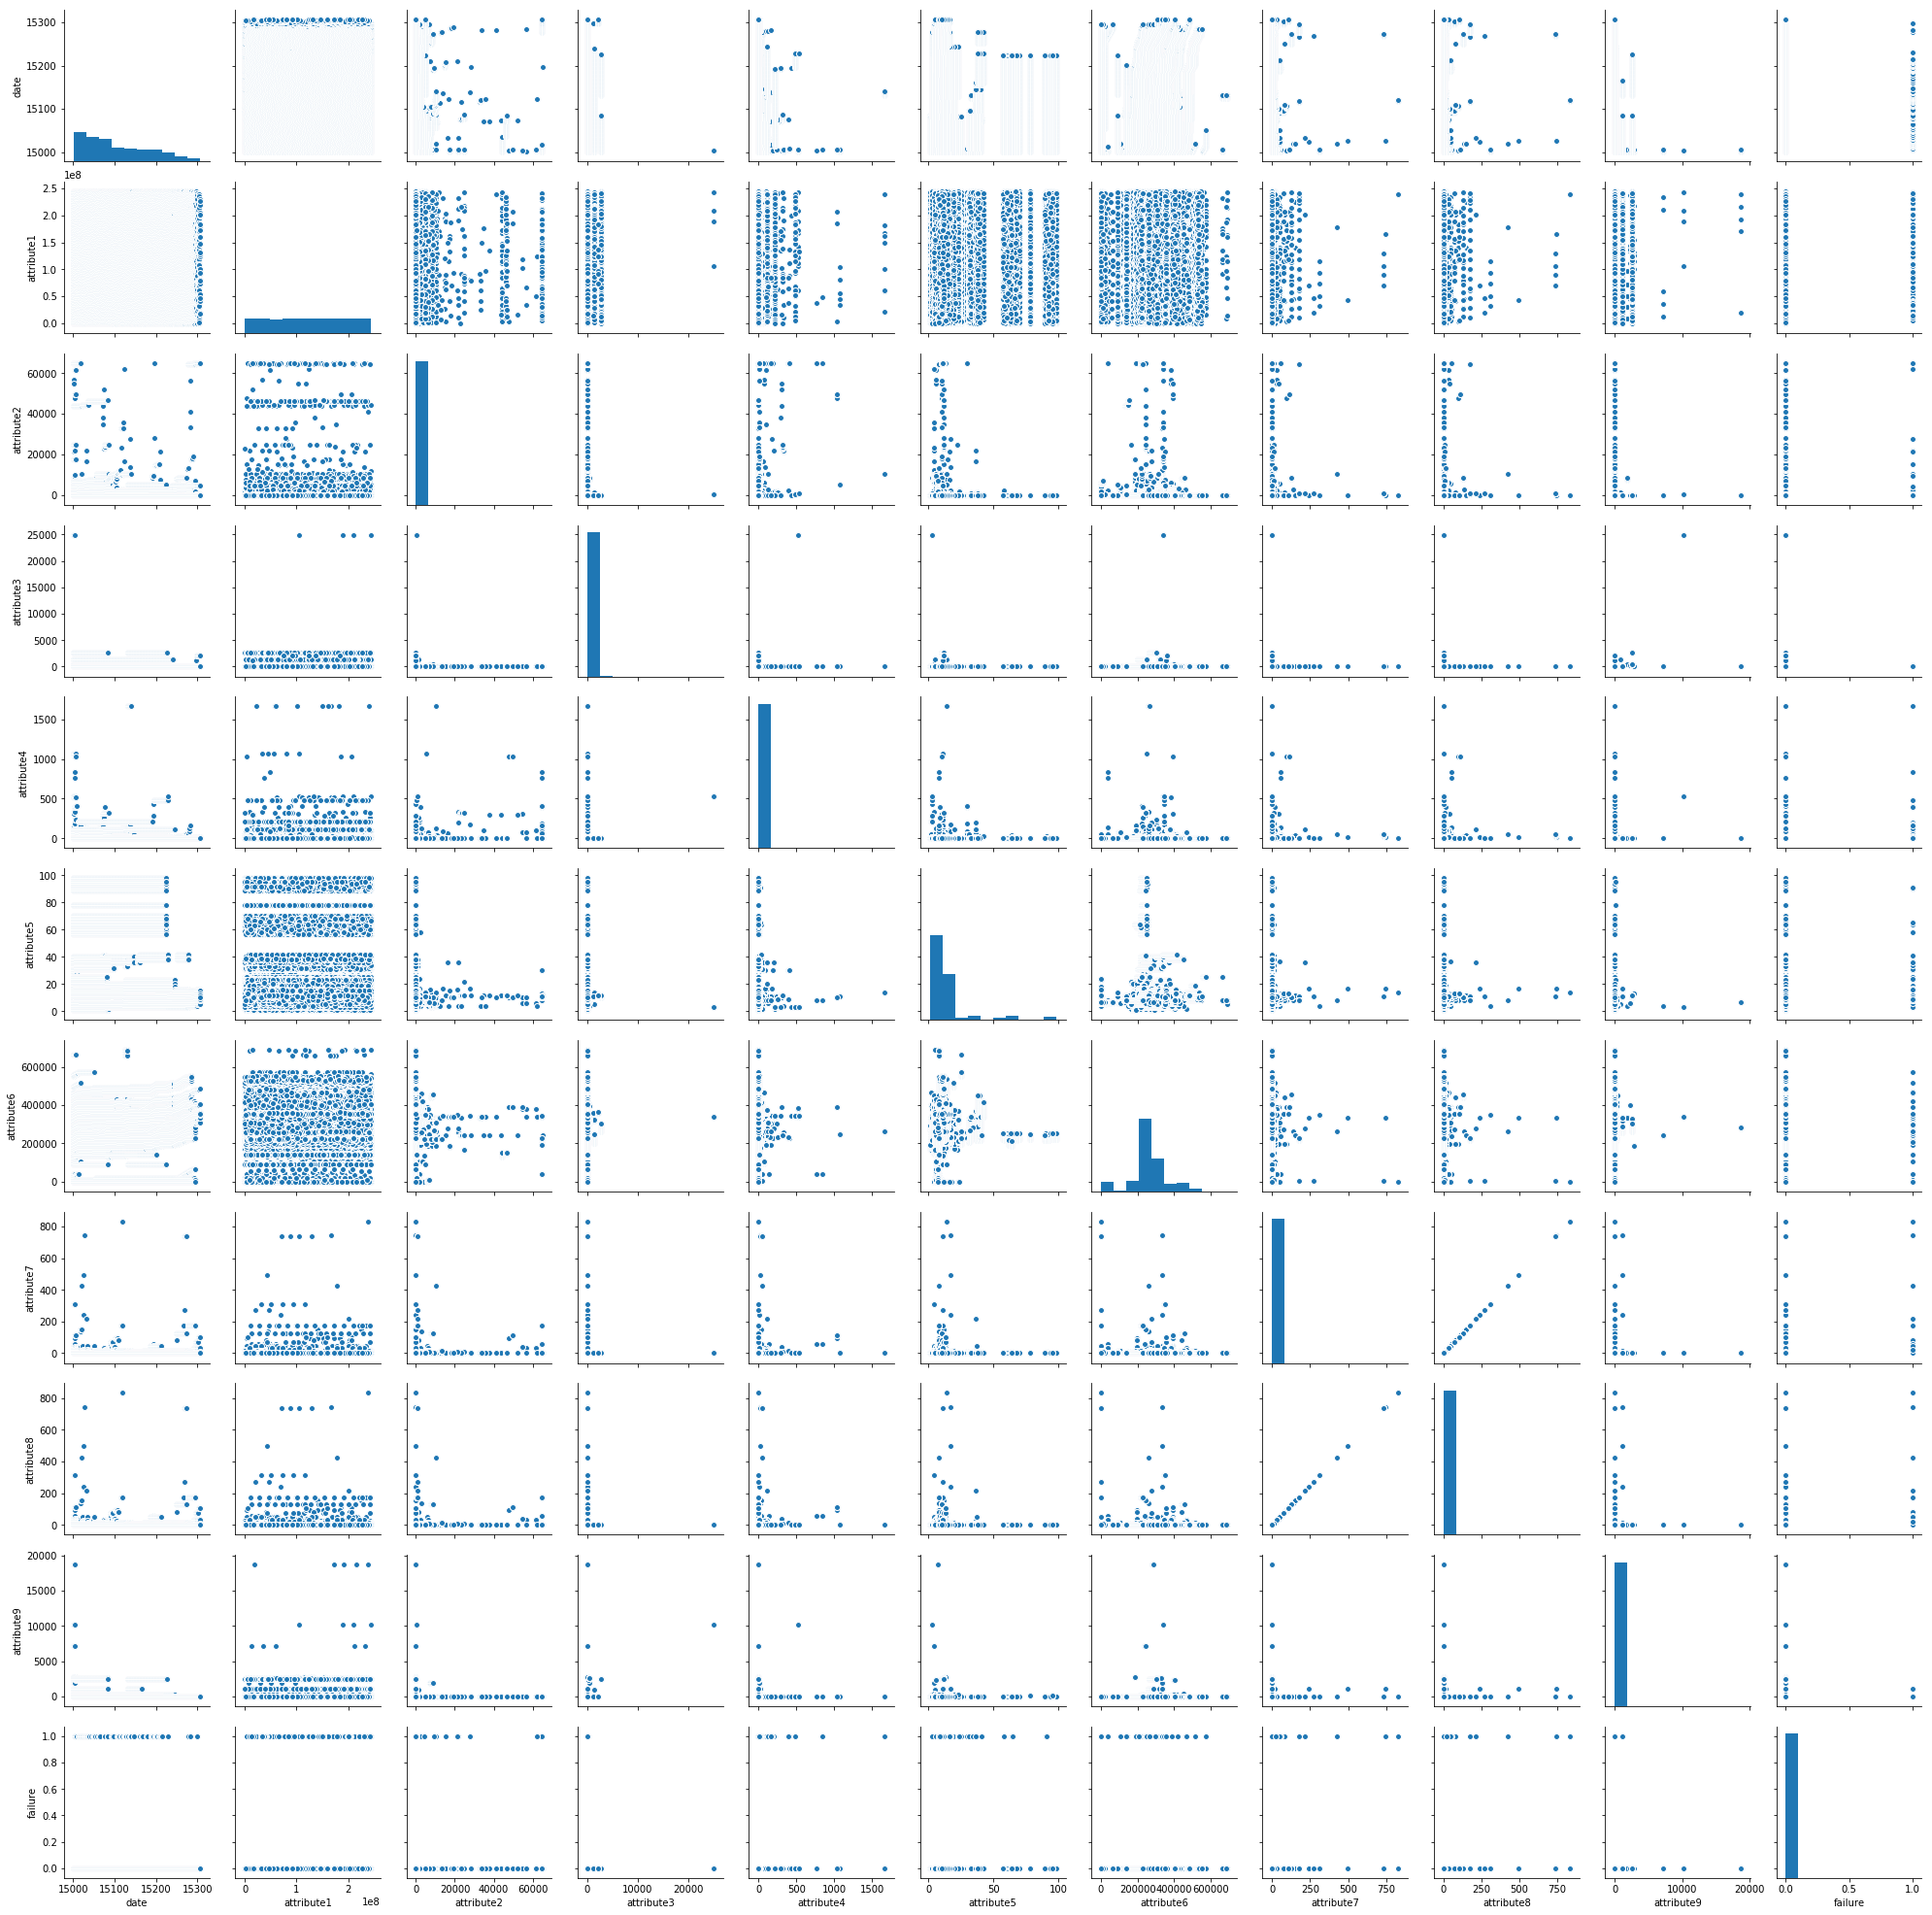

In [18]:
sns.pairplot(data_for_view)

Above graph shows me tha attr7 and attr8 are linearly correlated, I want to double check that, yes - I will only take one of them as they are identical

In [25]:
from scipy.stats import linregress

linregress(data['attribute7'],data['attribute8'])

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)

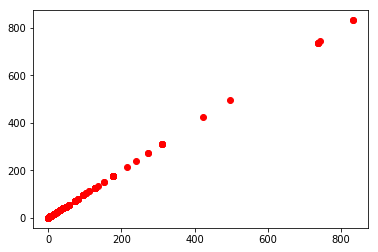

In [26]:
plt.scatter(data['attribute7'],data['attribute8'], color = 'red')


In [31]:
columns = ['date', 'attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6',  'attribute8', 'attribute9']

x = data[columns]

y = data['failure']

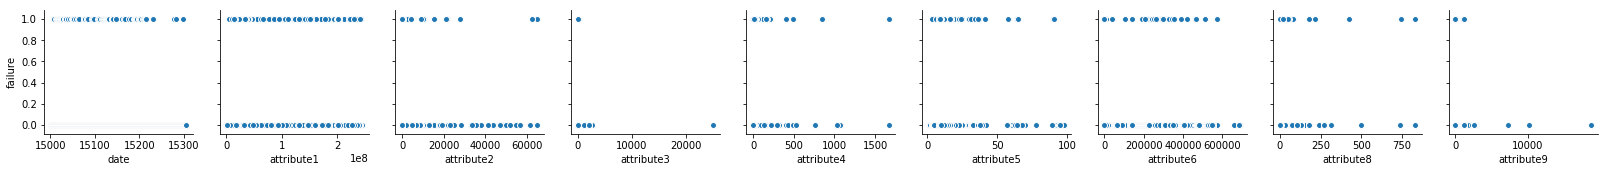

In [33]:
# Lets see the relation between the variables and the response (failure)
sns.pairplot(data, x_vars=columns, y_vars='failure', kind='scatter');

In [50]:
# Using custom generic function, which would fit and predict our model
def fit_predict(clf, x_train, y_train, X_test, y_test):
    """
    @ Arguements
        clf: A object of sklearn classifiers
        X_train: Training set data
        y_train: Training set labels
        X_test: Test set data
        y_test: Test set labels
    
    @ Returns
        None
    """
    clf.fit(x_train, y_train)
    
    train_pred = clf.predict(x_train)
    print("Training Accuracy:", sum(y_train == train_pred)/len(train_pred))
    print("Log Loss Train:", log_loss(y_train, train_pred))
    print("AUROC Score Train:", roc_auc_score(y_train, train_pred))
    print("Confusion Matrix:", confusion_matrix(y_train, train_pred))

    

    test_pred = clf.predict(x_test)
    print("\nTest Accuracy:", sum(y_test == test_pred)/len(test_pred))
    print("Log Loss Test:", log_loss(y_test, test_pred))
    print("AUROC Score Test:", roc_auc_score(y_test, test_pred))
    print("Confusion Matrix:", confusion_matrix(y_test, test_pred))

In [51]:
# Split into the Training set and Test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y)

print ("Training Data Set Dimensions=", x_train.shape, "Training True Class labels dimensions=", y_train.shape)
print ("Test Data Set Dimensions=", x_test.shape, "Test True Class labels dimensions=", y_test.shape)

Training Data Set Dimensions= (87145, 9) Training True Class labels dimensions= (87145,)
Test Data Set Dimensions= (37349, 9) Test True Class labels dimensions= (37349,)


In [52]:
#Feature scaling for optimal performance
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# 2. ML Models and 3. Evaluations

### Linear SVC

In [55]:
print("--------------------------Linear SVC -standardized x------------------------")

#with standard values 
clf = LinearSVC(class_weight='balanced')
fit_predict(clf, x_train_std, y_train, x_test_std, y_test)
print("--------------------------Linear SVC -no standardized x------------------------")

#without standard values
clf = LinearSVC(class_weight='balanced')
fit_predict(clf, x_train, y_train, x_test, y_test)

--------------------------Linear SVC -standardized x------------------------
Training Accuracy: 0.9969935165528716
Log Loss Train: 0.1038421496647806
AUROC Score Train: 0.6204386789656282
Confusion Matrix: [[86865   206]
 [   56    18]]

Test Accuracy: 0.0008567833141449571
Log Loss Test: 34.509983059953
AUROC Score Test: 0.5
Confusion Matrix: [[    0 37317]
 [    0    32]]
--------------------------Linear SVC -no standardized x------------------------
Training Accuracy: 0.9991508405531011
Log Loss Train: 0.029328928260066296
AUROC Score Train: 0.5
Confusion Matrix: [[87071     0]
 [   74     0]]

Test Accuracy: 0.999143216685855
Log Loss Test: 0.029592247306144178
AUROC Score Test: 0.5
Confusion Matrix: [[37317     0]
 [   32     0]]


# Decision Tree Classifier


In [56]:
print("----------------------Decision Tree Classifier - standardize x-----------------")

#with standard values 
clf = DecisionTreeClassifier(class_weight='balanced')
fit_predict(clf, x_train_std, y_train, x_test_std, y_test)

print("----------------------Decision Tree Classifier - no standardize x-----------------")
#without standard values
clf = DecisionTreeClassifier(class_weight='balanced')
fit_predict(clf, x_train, y_train, x_test, y_test)

----------------------Decision Tree Classifier - standardize x-----------------
Training Accuracy: 1.0
Log Loss Train: 9.99200722162641e-16
AUROC Score Train: 1.0
Confusion Matrix: [[87071     0]
 [    0    74]]

Test Accuracy: 0.999143216685855
Log Loss Test: 0.029592247306144178
AUROC Score Test: 0.5
Confusion Matrix: [[37317     0]
 [   32     0]]
----------------------Decision Tree Classifier - no standardize x-----------------
Training Accuracy: 1.0
Log Loss Train: 9.99200722162641e-16
AUROC Score Train: 1.0
Confusion Matrix: [[87071     0]
 [    0    74]]

Test Accuracy: 0.9985006292002463
Log Loss Test: 0.051787010823466505
AUROC Score Test: 0.5465132345847737
Confusion Matrix: [[37290    27]
 [   29     3]]


### Random Forest Classifier

In [57]:
print("--------------------Random Forest Classifier -standardized x-------------------")

#with standard values 
clf = RandomForestClassifier(class_weight='balanced')
fit_predict(clf, x_train_std, y_train, x_test_std, y_test)

print("--------------------Random Forest Classifier - no standardized x-------------------")

#without standard values
clf = RandomForestClassifier(class_weight='balanced')
fit_predict(clf, x_train, y_train, x_test, y_test)

--------------------Random Forest Classifier -standardized x-------------------
Training Accuracy: 0.9998163979574273
Log Loss Train: 0.006341389894069171
AUROC Score Train: 0.8918918918918919
Confusion Matrix: [[87071     0]
 [   16    58]]

Test Accuracy: 0.999143216685855
Log Loss Test: 0.029592247306144178
AUROC Score Test: 0.5
Confusion Matrix: [[37317     0]
 [   32     0]]
--------------------Random Forest Classifier - no standardized x-------------------
Training Accuracy: 0.9997819725744449
Log Loss Train: 0.007530400499206952
AUROC Score Train: 0.8716216216216216
Confusion Matrix: [[87071     0]
 [   19    55]]

Test Accuracy: 0.999143216685855
Log Loss Test: 0.029592247306144178
AUROC Score Test: 0.5
Confusion Matrix: [[37317     0]
 [   32     0]]


### Logistics Regression

In [58]:
print("--------------------Logistic Regression -standardized x-------------------")

#with standard values 
clf = LogisticRegression(class_weight='balanced')
fit_predict(clf, x_train_std, y_train, x_test_std, y_test)

print("--------------------Logistic Regression -no standardized x-------------------")

#without standard values
clf = LogisticRegression(class_weight='balanced')
fit_predict(clf, x_train, y_train, x_test, y_test)

--------------------Logistic Regression -standardized x-------------------
Training Accuracy: 0.9685466750817603
Log Loss Train: 1.0863842309608527
AUROC Score Train: 0.7817295422468213
Confusion Matrix: [[84360  2711]
 [   30    44]]

Test Accuracy: 0.0008567833141449571
Log Loss Test: 34.509983059953
AUROC Score Test: 0.5
Confusion Matrix: [[    0 37317]
 [    0    32]]
--------------------Logistic Regression -no standardized x-------------------
Training Accuracy: 0.9692237076137472
Log Loss Train: 1.062999805197521
AUROC Score Train: 0.7753173318947228
Confusion Matrix: [[84420  2651]
 [   31    43]]

Test Accuracy: 0.96781707676243
Log Loss Test: 1.1115841374612445
AUROC Score Test: 0.7028859166063725
Confusion Matrix: [[36133  1184]
 [   18    14]]


### KNN

In [59]:
print("--------------------KNN -standardized x-------------------")

#with standard values 
clf = KNeighborsClassifier(n_neighbors=2, metric='minkowski')
fit_predict(clf, x_train_std, y_train, x_test_std, y_test)

print("--------------------KNN -no standardized x-------------------")

#without standard values
clf = KNeighborsClassifier(n_neighbors=2, metric='minkowski')
fit_predict(clf, x_train, y_train, x_test, y_test)

--------------------KNN -standardized x-------------------
Training Accuracy: 0.9991852659360836
Log Loss Train: 0.02813991765492851
AUROC Score Train: 0.5202702702702703
Confusion Matrix: [[87071     0]
 [   71     3]]

Test Accuracy: 0.999143216685855
Log Loss Test: 0.029592247306144178
AUROC Score Test: 0.5
Confusion Matrix: [[37317     0]
 [   32     0]]
--------------------KNN -no standardized x-------------------
Training Accuracy: 0.9991508405531011
Log Loss Train: 0.029328928260066296
AUROC Score Train: 0.5
Confusion Matrix: [[87071     0]
 [   74     0]]

Test Accuracy: 0.999143216685855
Log Loss Test: 0.029592247306144178
AUROC Score Test: 0.5
Confusion Matrix: [[37317     0]
 [   32     0]]


### SVC 

In [60]:
print("--------------------SVC -standardized x-------------------")

#with standard values 
clf = SVC(kernel = 'rbf')
fit_predict(clf, x_train_std, y_train, x_test_std, y_test)

--------------------SVC -standardized x-------------------
Training Accuracy: 0.9992082161914051
Log Loss Train: 0.02734724391816999
AUROC Score Train: 0.5337837837837838
Confusion Matrix: [[87071     0]
 [   69     5]]

Test Accuracy: 0.999143216685855
Log Loss Test: 0.029592247306144178
AUROC Score Test: 0.5
Confusion Matrix: [[37317     0]
 [   32     0]]


# 4. Conclusion

First of all, our classes are highly imbalanced.  We have alot more data for failure = 0. 

Based on the ML algorithms I ran, I can see that in general, algorithms give similar accuracy. With imbalanced class, using accuracy alone would not be an optimal way. 

So, to overcome this, I have added Binary-cross-entropy loss and AUROC Score to accuracy.
After evaluating on different models, we can see that loss value and AUROC Score is different in all algorithms. It will be wise to choose the algorithm with higher AUROC Score.

We can see that Logistic classifier give AUROC value of around 0.70, SVC gives AUROC values around 0.5 on test set. This is because after correctly classifying the example, SVC does not optimize it. Also, we can see. better AUROC score with standardized X test and X train values. On the other hand logistic regression pushes the probabilities to higher even after correctly classifying, resulting to better AUROC scores. So, in this case Logistic classifier leads to better generalization.

Decision tree train AUROC score and test AUROC scores are quite far from each other. We can explain this issue as overfitting.  Random forest is a better choice but the Auroc score is still lover than teh logistic regression. As it is not general enough, my choice would be logistic regression for this type of problem. 